In [1]:
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [2]:
HepG2_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig = np.load('../fig3/tss/temp/HepG2_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig.npy', allow_pickle=True).item()
auxiliary_files_path = '/data1/lmh_data/MINE/source/HepG2'


In [3]:
def read_bedpe_file(path):
    _loops = dict()
    with open(path)as f:
        lines = f.readlines()
        for line in lines[1:]:
            datas = line.strip().split()
            if datas[0] != datas[3]:
                continue
            if float(datas[12]) > 0.05:
                continue
            left1, right1 = int(int(datas[1])/1000), int(int(datas[2])/1000)
            left2, right2 = int(int(datas[4])/1000), int(int(datas[5])/1000)
            if abs(left1 - right2) > 100:
                continue
#             bin1, bin2 = list(range(left1, right1+1)), list(range(left2, right2+1))
#             if datas[0] not in _loops.keys():
#                 _loops[datas[0]] = set()
#             for i in bin1:
#                 for j in bin2:
#                     _loops[datas[0]].add((i, j))

            if datas[0] not in _loops.keys():
                _loops[datas[0]] = set()
            bin1, bin2 = int((left1+right1)/2), int((left2+right2)/2)
            _loops[datas[0]].add((bin1, bin2))
    return _loops

def get_hit_indicators(significants, loops, chr):
    results = set()
    for sig in significants:
        x, y = int(sig[0]), int(sig[1])
        if (x, y) in loops:
            results.add((x, y, chr))
    return results

def show_venn(enhanced_sigs, chia_pet_loops):
    venn2(subsets = [chia_pet_loops, enhanced_sigs], set_labels = ('chia_pet_loops', 'enhanced_sigs'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
    plt.show()

def show_venn_with_redundancy(enhanced_sigs, chia_pet_loops, radius):
    _enhanced_sigs = enhanced_sigs.copy()
    _chia_pet_loops = set()
    for chia_pet_loop in chia_pet_loops:
        flag = False
        for _enhanced_sig in _enhanced_sigs:
            if abs(chia_pet_loop[0]-_enhanced_sig[0])<radius and abs(chia_pet_loop[1]-_enhanced_sig[1])<radius:
                _chia_pet_loops.add(_enhanced_sig)
                flag = True
        _chia_pet_loops.add(chia_pet_loop)
        if flag:
            _enhanced_sigs.add(chia_pet_loop)
    show_venn(_enhanced_sigs, _chia_pet_loops)

def figure(loops_path):
    chia_pet_loops = set()
    enhanced_sigs = set()
    old_chia_pet_loops = read_bedpe_file(loops_path)
    for chr in range(1, 23):
#         chia_pet_enhanced_result = get_hit_indicators(HepG2_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig[chr], old_chia_pet_loops['chr{}'.format(chr)], chr)
#         chia_pet_loops = chia_pet_loops | chia_pet_enhanced_result
        for sig in HepG2_ATAC_H3K27ac_H3K4me3_2_100_all_enhanced_sig[chr]:
            enhanced_sigs.add((int(sig[0]), int(sig[1]), chr))
        for loop in old_chia_pet_loops['chr{}'.format(chr)]:
            chia_pet_loops.add((loop[0], loop[1], chr))
            
    show_venn(enhanced_sigs, chia_pet_loops)
    show_venn_with_redundancy(enhanced_sigs, chia_pet_loops, 3)
    show_venn_with_redundancy(enhanced_sigs, chia_pet_loops, 4)
    show_venn_with_redundancy(enhanced_sigs, chia_pet_loops, 5)
        

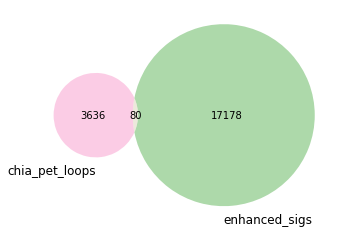

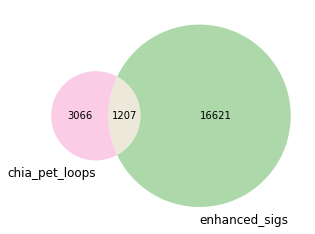

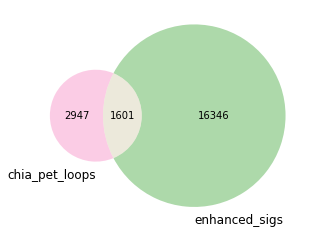

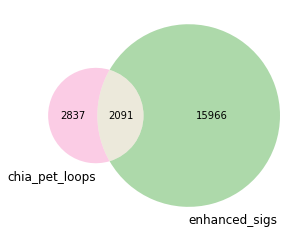

In [4]:
loops_path = os.path.join(auxiliary_files_path, 'CTCF_chia_pet', 'out.interactions.MICC')
figure(loops_path)

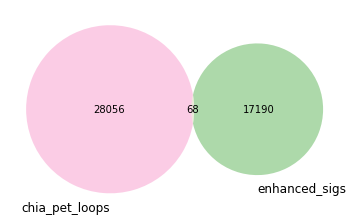

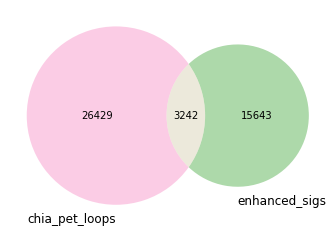

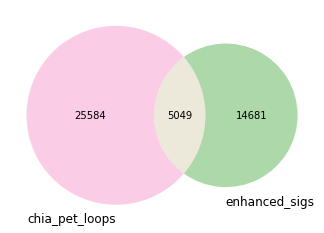

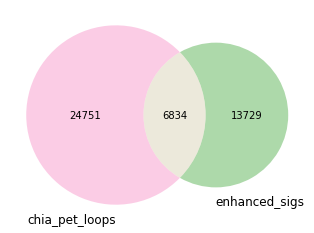

In [5]:
loops_path = os.path.join(auxiliary_files_path, 'POLR2A_chia_pet', 'out.interactions.MICC')
figure(loops_path)